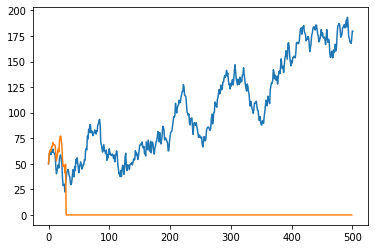

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from DataHandler import DataHandler
from TradingEnvDiscrete import TradingEnvironment
from TradingSimulatorDiscrete import TradingSimulator
# dynamics params
X_0 = 100000
q = 5000
F_0 = 50 # init price
rho = 2.2231
lambda_ = -1.1321174386432996e-06
T = 1
N = 500
timestamps = list(range(0, N+1))#[n*T/N for n in range(0,N+1)]

def get_random_walk(scale_param = 5):
    P = F_0
    F = [P]
    for i in range(N+1):
        P += np.random.normal(0, 1)*scale_param
        F.append(P)
    return F
F = get_random_walk()
plt.plot(F)
data = pd.Series(F)

env = TradingEnvironment(TradingSimulator, data, len(data))
state = env.reset()
a = 0
rewards = 0
for i in range(len(data)):
    #print('step', env.simulator.step, '|| inventory:', env.simulator.inventory, '|| price', env.simulator.prices[i])
    state, reward, info, done = env.step(np.random.choice(10000))
    #print(np.clip((env.simulator.strategy_costs[env.simulator.step-1] - env.simulator.strategy_costs[env.simulator.step])/env.simulator.strategy_costs[env.simulator.step-1], -1, 1))
plt.plot(env.simulator.prices[:-1])

In [2]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [3]:
env2 = TradingEnvironment(TradingSimulator, data, len(data))

state = env2.reset()
a = 0
for i in range(len(data)):
    if i == 0 or i == len(data)-2:
        a = X_0/(rho*T + 2)
        state, reward, info, done = env2.step(a)
    else:
        a = rho*X_0/(rho*T+2)/(len(data)-3)
        state, reward, info, done = env2.step(a)
print('Average cost:', np.mean(env2.simulator.rewards))

Average cost: -0.00023780565573167434


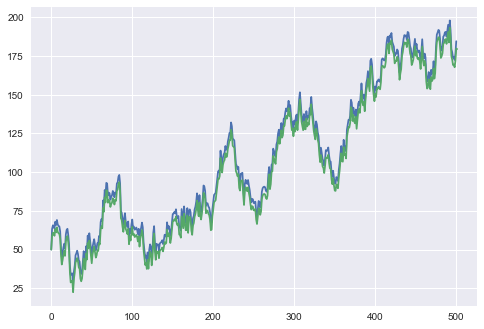

In [4]:
plt.plot(env2.simulator.prices)
plt.plot(data)

In [5]:
#for i in range(1, len(data)-2):
#    print(np.sum([env2.simulator.actions[i]*env.simulator.kappa*np.exp(-env2.simulator.rho*1/env.simulator.N*(env2.simulator.step - j)) for j in range(i)]))

In [6]:
#for i in range(len(data)-1):
#    print(np.sum([env2.simulator.actions[i]*env2.simulator.kappa*np.exp(-env2.simulator.rho*1/env2.simulator.N*(j - i)) for j in range(i)]))

In [7]:
print('Actions history', np.round(env2.simulator.actions, 4))
print('Sum', np.sum(env2.simulator.actions))
print('Env remain:', env2.simulator.remaining)
print('Rewards', np.round(env2.simulator.rewards, 4)[-4:])

print('=======')

print('Average cost:', np.mean(env2.simulator.rewards))
print('Total cost:', np.sum(env2.simulator.rewards))

Actions history [23679.2877   105.4938   105.4938   105.4938   105.4938   105.4938
   105.4938   105.4938   105.4938   105.4938   105.4938   105.4938
   105.4938   105.4938   105.4938   105.4938   105.4938   105.4938
   105.4938   105.4938   105.4938   105.4938   105.4938   105.4938
   105.4938   105.4938   105.4938   105.4938   105.4938   105.4938
   105.4938   105.4938   105.4938   105.4938   105.4938   105.4938
   105.4938   105.4938   105.4938   105.4938   105.4938   105.4938
   105.4938   105.4938   105.4938   105.4938   105.4938   105.4938
   105.4938   105.4938   105.4938   105.4938   105.4938   105.4938
   105.4938   105.4938   105.4938   105.4938   105.4938   105.4938
   105.4938   105.4938   105.4938   105.4938   105.4938   105.4938
   105.4938   105.4938   105.4938   105.4938   105.4938   105.4938
   105.4938   105.4938   105.4938   105.4938   105.4938   105.4938
   105.4938   105.4938   105.4938   105.4938   105.4938   105.4938
   105.4938   105.4938   105.4938   105.4938  

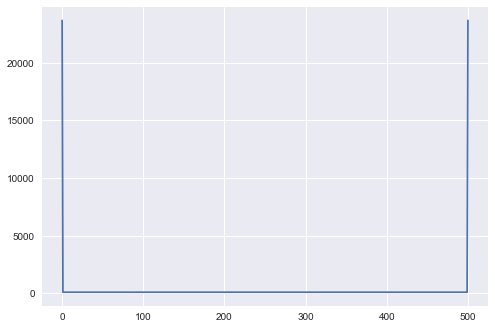

In [8]:
plt.plot(env2.simulator.actions)

In [9]:
#https://github.com/BY571/SAC_discrete

import gym
import numpy as np
from collections import deque
import torch
from buffer import ReplayBuffer
import glob
from utils import save, collect_random
import random
from agent import SAC


np.random.seed(1)
random.seed(1)
torch.manual_seed(1)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

steps = 0
average10 = deque(maxlen=10)
total_steps = 0
    

agent = SAC(state_size=4, action_size=101, device=device)

buffer = ReplayBuffer(buffer_size=10000, batch_size=64, device=device)

collect_random(env=env, dataset=buffer, num_samples=10000)

In [10]:
episodes = 10
for episode in range(episodes):
  state = env.reset()
  episode_steps = 0
  rewards = 0
  for s in range(len(data)):
      action = agent.get_action(state)
      steps += 1
      next_state, reward, info, done  = env.step(np.floor(action/100*env.simulator.remaining))
      buffer.add(state, action, reward, next_state, done)
      policy_loss, alpha_loss, bellmann_error1, bellmann_error2, current_alpha = agent.learn(steps, buffer.sample(), gamma=1)
      state = next_state
      rewards += reward
      episode_steps += 1
      if done:
            pass

  if episode % 1 == 0: # print average shortfall over last 100 episodes
        print('Episode:', episode, 'Average episode reward', np.mean(env.simulator.rewards), 'Total reward', np.sum(env.simulator.rewards))

Episode: 0 Average episode reward -0.00038626856301533384 Total reward -0.19390681863369758
Episode: 1 Average episode reward -0.00022813525974243925 Total reward -0.11452390039070451
Episode: 2 Average episode reward -0.0002838245650990492 Total reward -0.1424799316797227
Episode: 3 Average episode reward -0.00017005237428108404 Total reward -0.08536629188910419
Episode: 4 Average episode reward -0.0002479987716294946 Total reward -0.12449538335800628
Episode: 5 Average episode reward -0.00021385630013744548 Total reward -0.10735586266899763
Episode: 6 Average episode reward -0.00031350572346571545 Total reward -0.15737987317978916
Episode: 7 Average episode reward -0.0002766944413911 Total reward -0.1389006095783322
Episode: 8 Average episode reward -0.0002614167592716956 Total reward -0.13123121315439118
Episode: 9 Average episode reward -0.00026622375029833215 Total reward -0.13364432264976273


In [77]:
#i = 100
#[np.exp(-env.simulator.rho*1/env.simulator.N*(i - j)) for j in range(i)]


In [78]:
#for i in range(1, len(data)-2):
#    print(np.sum([env.simulator.actions[i]*env.simulator.kappa*np.exp(-env.simulator.rho*1/env.simulator.N*(env.simulator.step - j)) for j in range(i)]))


In [11]:
print('Actions history', np.round(env.simulator.actions, 4))
print('Sum', np.sum(env.simulator.actions))
print('Env remain:', env.simulator.remaining)
print('Rewards', np.round(env.simulator.rewards, 4)[-4:])

print('=======')

print('Average reward:', np.mean(env2.simulator.rewards))
print('Total reward:', np.sum(env2.simulator.rewards))
print('Total cost (analytical):', np.sum(env2.simulator.execution_prices * env2.simulator.actions))
#print('Total cost:', np.sum(env2.simulator.strategy_costs))
print('=======')
print('Average rewards (RL):', np.mean(env.simulator.rewards))
print('Total reward (RL):', np.sum(env.simulator.rewards))
print('Total cost (RL):', np.sum(env.simulator.execution_prices * env.simulator.actions))
#print('Total cost (RL):', np.sum(env.simulator.strategy_costs))
print('=======')
print('cost ratio:',  np.sum(env.simulator.execution_prices * env.simulator.actions)/np.sum(env2.simulator.execution_prices * env2.simulator.actions))

Actions history [   0.    0. 1000.  990.    0.    0.  980.    0.  970.  960.    0.  951.
  941.  932.  922.    0.  913.    0.    0.  904.    0.    0.    0.    0.
  895.    0.  886.  877.    0.  868.    0.    0.  860.    0.    0.  851.
    0.    0.    0.    0.    0.    0.  843.  834.    0.    0.    0.    0.
    0.    0.  826.  817.    0.    0.  809.    0.  801.    0.    0.  793.
    0.  785.    0.    0.  777.  770.    0.    0.  762.  754.    0.    0.
  747.  739.  732.    0.  725.  717.  710.    0.  703.    0.    0.  696.
    0.  689.  682.    0.  675.    0.  669.    0.    0.  662.  655.    0.
    0.  649.    0.  642.    0.  636.    0.  630.    0.  623.  617.    0.
  611.    0.  605.  599.    0.  593.  587.    0.  581.  575.    0.  569.
  564.  558.    0.  552.    0.    0.    0.  547.  541.  536.  531.  525.
  520.    0.    0.    0.    0.  515.  510.    0.  505.  500.    0.  495.
    0.  490.  485.  480.  475.    0.  470.  466.    0.    0.  461.  456.
  452.  447.  443.    0.    0.  438

In [12]:
print('Actions history', np.round(env.simulator.actions, 4))
print('Sum', np.sum(env.simulator.actions))
print('Env remain:', env.simulator.remaining)
print('Rewards', np.round(env.simulator.rewards, 4)[-4:])

print('=======')

print('Average reward:', np.mean(env2.simulator.rewards))
print('Total reward:', np.sum(env2.simulator.rewards))
print('Total cost (analytical):', np.sum(env2.simulator.execution_prices * env2.simulator.actions))
#print('Total cost:', np.sum(env2.simulator.strategy_costs))
print('=======')
print('Average rewards (RL):', np.mean(env.simulator.rewards))
print('Total reward (RL):', np.sum(env.simulator.rewards))
print('Total cost (RL):', np.sum(env.simulator.execution_prices * env.simulator.actions))
#print('Total cost (RL):', np.sum(env.simulator.strategy_costs))
print('=======')
print('cost ratio:',  np.sum(env.simulator.execution_prices * env.simulator.actions)/np.sum(env2.simulator.execution_prices * env2.simulator.actions))

Actions history [   0.    0. 1000.  990.    0.    0.  980.    0.  970.  960.    0.  951.
  941.  932.  922.    0.  913.    0.    0.  904.    0.    0.    0.    0.
  895.    0.  886.  877.    0.  868.    0.    0.  860.    0.    0.  851.
    0.    0.    0.    0.    0.    0.  843.  834.    0.    0.    0.    0.
    0.    0.  826.  817.    0.    0.  809.    0.  801.    0.    0.  793.
    0.  785.    0.    0.  777.  770.    0.    0.  762.  754.    0.    0.
  747.  739.  732.    0.  725.  717.  710.    0.  703.    0.    0.  696.
    0.  689.  682.    0.  675.    0.  669.    0.    0.  662.  655.    0.
    0.  649.    0.  642.    0.  636.    0.  630.    0.  623.  617.    0.
  611.    0.  605.  599.    0.  593.  587.    0.  581.  575.    0.  569.
  564.  558.    0.  552.    0.    0.    0.  547.  541.  536.  531.  525.
  520.    0.    0.    0.    0.  515.  510.    0.  505.  500.    0.  495.
    0.  490.  485.  480.  475.    0.  470.  466.    0.    0.  461.  456.
  452.  447.  443.    0.    0.  438

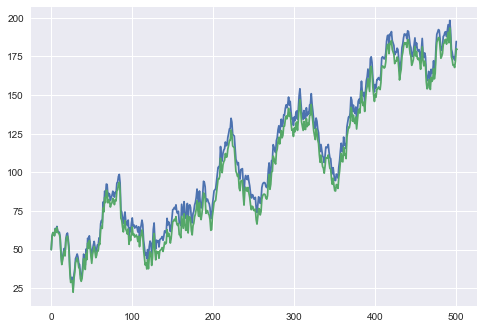

In [13]:
plt.plot(env.simulator.prices)
plt.plot(data)

In [14]:
SAC_actions_1 = env.simulator.actions.copy()

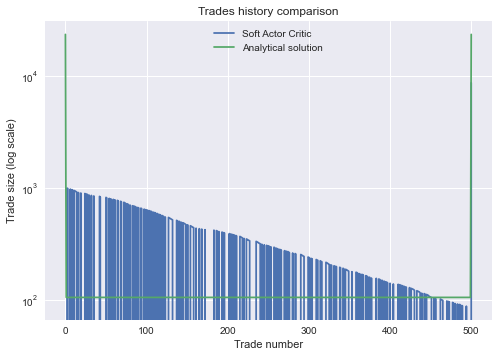

In [15]:
plt.plot(SAC_actions_1, label ='Soft Actor Critic')
#plt.plot(env.simulator.actions, label ='Soft Actor Critic (gamma = 0.9)')
plt.plot(env2.simulator.actions, label ='Analytical solution')
plt.ylabel('Trade size (log scale)')
plt.xlabel('Trade number')
plt.yscale('log')
plt.title('Trades history comparison')
plt.legend()

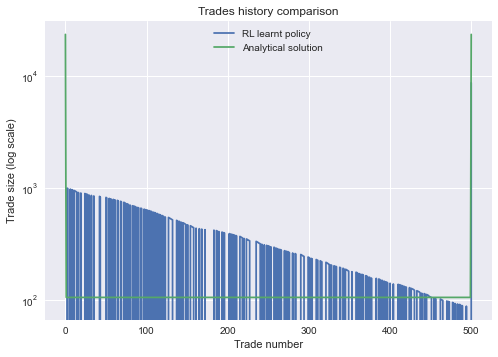

In [16]:
plt.plot(SAC_actions_1, label ='RL learnt policy')
#plt.plot(env.simulator.actions, label ='Soft Actor Critic (gamma = 0.9)')
plt.plot(env2.simulator.actions, label ='Analytical solution')
plt.ylabel('Trade size (log scale)')
plt.xlabel('Trade number')
plt.yscale('log')
plt.title('Trades history comparison')
plt.legend()

In [17]:
accum_costs2 = [np.sum((env2.simulator.execution_prices*env2.simulator.actions)[:t]) for t in range(len(data))]
accum_costs = [np.sum((env.simulator.execution_prices*env.simulator.actions)[:t]) for t in range(len(data))]

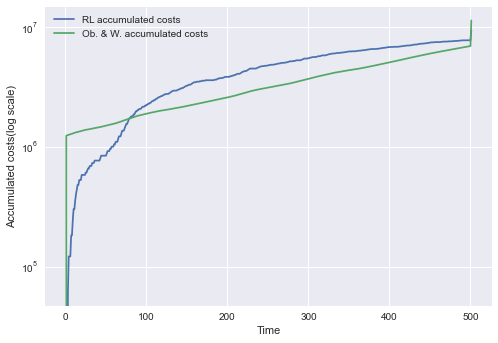

In [18]:
plt.plot(accum_costs, label = 'RL accumulated costs')
plt.plot(accum_costs2 , label='Ob. & W. accumulated costs')
plt.ylabel('Accumulated costs(log scale)')
plt.xlabel('Time')
plt.yscale('log')
plt.legend()

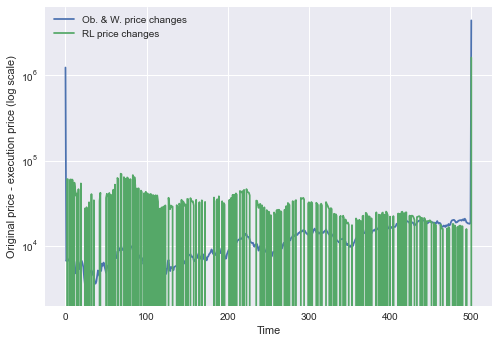

In [19]:
plt.plot(env2.simulator.execution_prices*env2.simulator.actions , label='Ob. & W. price changes')
plt.plot(env.simulator.execution_prices*env.simulator.actions, label = 'RL price changes')
plt.ylabel('Original price - execution price (log scale)')
plt.xlabel('Time')
plt.yscale('log')
plt.legend()

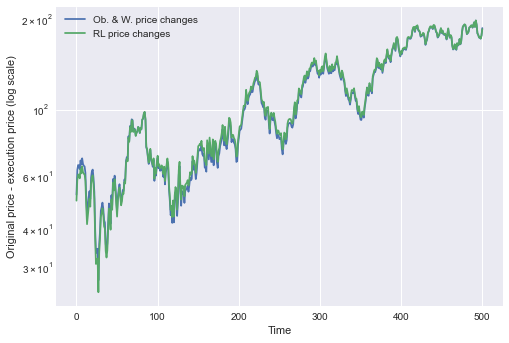

In [20]:
plt.plot(env2.simulator.execution_prices , label='Ob. & W. price changes')
plt.plot(env.simulator.execution_prices, label = 'RL price changes')
plt.ylabel('Original price - execution price (log scale)')
plt.xlabel('Time')
plt.yscale('log')
plt.legend()

In [21]:
np.sum((env2.simulator.execution_prices - env2.simulator.prices)**2)

11.269706803666436

In [22]:
np.sum((env.simulator.execution_prices - env.simulator.prices)**2)

1.2628084600000111

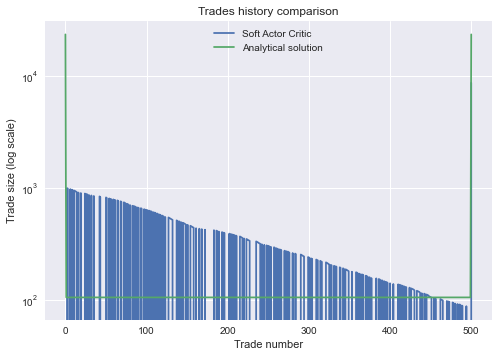

In [23]:
plt.plot(env.simulator.actions, label ='Soft Actor Critic')
#plt.plot(env.simulator.actions, label ='Soft Actor Critic (gamma = 0.9)')
plt.plot(env2.simulator.actions, label ='Analytical solution')
plt.ylabel('Trade size (log scale)')
plt.xlabel('Trade number')
plt.yscale('log')
plt.title('Trades history comparison')
plt.legend()

In [24]:
!pip install importnb

In [25]:
import time
import math
import numpy as np
import matplotlib.pyplot as plt
with __import__('importnb').Notebook(): 
    import OrderFlow_helpers
from scipy import interpolate
np.random.seed(30)
np.seterr(divide='ignore', invalid='ignore')
font = {'family': 'serif',
        'style': 'italic',
        # 'color': 'darkred',
        'weight': 1,
        'size': 16,
        }

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\inputsplitter.py:21: DeprecationWarning: IPython.core.inputsplitter is deprecated since IPython 7 in favor of `IPython.core.inputtransformer2`
  warn('IPython.core.inputsplitter is deprecated since IPython 7 in favor of `IPython.core.inputtransformer2`',


In [26]:
Nsims = 500  # Number of simulations

# Time grid
T = 1  # Expiry
Ndt = 500#int(6.5*360)  # Number of time increments
dt = T/Ndt  # Time change increment
t = np.arange(0, T+0.00000001, dt)  # Time increments vector 

k = 0.001  # Temporary Market Impact
b = 0.0001  # Permanent Price Impact Factor

lam = 1000 # Frequency of Arrival of Order-Flow Changes
kappa = 10  # Rate of Order-Flow Mean-reversion
eta_mean = 5  # Mean Order-Flow Jump Size

initial_price = 50  # Starting Fundamental Price
initial_invt = 1  # Starting Inventory amount
phi = 0.01  # Running penalty coefficient
sigma = 0.1  # Volatilty (recall this is an artihmetic model)

alpha = 100  # Terminal penalty 
idxfig = [52, 291, 9]  # Index of path to be plotted

In [27]:
# Computing chi variable
zeta = ((alpha-0.5*b) + (k*phi)**0.5)/((alpha-0.5*b) - (k*phi)**0.5)  
gamma = (phi/k)**0.5
tau = T-t  # Time remaining to the end of the trading horizon
chi = np.divide((k*phi)**0.5*(1 + zeta*np.exp(2*gamma*tau)), (1 - zeta*np.exp(2*gamma*tau)))
misspecify = False
kappa_false = 4
# Computing ell variable
def exp_p(a, tau):
    return (1 - np.exp(-a*tau)) / a
v1 = np.exp(gamma * tau)
tot = kappa_false - gamma if misspecify else kappa - gamma
dif = kappa_false + gamma if misspecify else kappa + gamma 
ell = (zeta * v1 * exp_p(tot, tau) \
       - v1**-1 * exp_p(dif, tau) )\
            /(zeta * v1 - v1**-1)


In [28]:
# Allocate space for the processes we simulate and store

mu = np.full([Nsims, Ndt+1], np.nan)  # Order Flow matrix

# Initializing variables for simulation base on computed strategy
X = np.full([Nsims, Ndt+1], np.nan)  # Cost matrix of Strategy
Q = np.full([Nsims, Ndt+1], np.nan)  # Inventory matrix

S = np.full([Nsims, Ndt+1], np.nan)  # Execution Price matrix

nu = np.full([Nsims, Ndt+1], np.nan)  # Rate of Trading matrix

# Initializing variables for simulation of Almgren-Chriss strategy
X_AC = np.full([Nsims, Ndt+1], np.nan)  # Cost matrix of Strategy
Q_AC = np.full([Ndt+1], np.nan)  # Inventory matrix

S_AC = np.full([Nsims, Ndt+1], np.nan)  # Execution Price matrix

nu_AC = np.full([Ndt+1], np.nan)  # Execution Price matrix

In [29]:
# Initial  conditions
Q[:, 0] = initial_invt
mu[:, 0] = 0
S[:, 0] = initial_price  
X[:, 0] = 0 

Q_AC[0] = initial_invt 
S_AC[:, 0] = initial_price
X_AC[:, 0] = 0

In [30]:
dW = dt**0.5 * np.random.randn(Nsims, Ndt+1)
for i in range(Ndt):
    ##  simulate order-flow forward
    
    # decide if an order-flow update arrives
    dn = (np.random.rand(Nsims, 1) < 1 - np.exp(-2 * lam * dt)).astype(int)
    # decide if it adds to the buy/sell pressure
    buysell = (np.random.rand(Nsims, 1) < 0.5)
    # generate the size of the order-flow impact
    eta = -eta_mean * np.log(np.random.rand(Nsims, 1))
    
    # simulate the SDE for mu forward
    mu[:, i + 1] = mu[:, i]*np.exp(-kappa * dt) + (eta * dn * (2 * buysell - 1)).reshape(Nsims)


In [31]:
def transform_state(state):
    return np.array([state[0][0], state[1][0], state[2][0], state[3][0]]).reshape(-1)

In [32]:
import numpy as np
from collections import namedtuple, deque
import gym
from matplotlib import pyplot as plt
import pandas as pd
from DataHandler_a import DataHandler
from TradingEnv_a import TradingEnvironment
from TradingSimulatorBase import TradingSimulatorBase as TradingSimulatorBase
import torch
import numpy as np
seed = 1
n_episodes = 1
GAMMA = 0.99
TAU = 1e-2
HIDDEN_SIZE = 256
BUFFER_SIZE = int(10000)
BATCH_SIZE = 64        # minibatch size
LR_ACTOR = 5e-4        # learning rate of the actor 
LR_CRITIC = 5e-4        # learning rate of the critic


Nsims = 1
Ndt = 500
dt = 1/Ndt
state_space_size = 1
continuous = False
min_action = 0
max_action = 1
dynamics_params = {
    'k': 0.001,
    'b': 0.0001,
    'lam': 1000,
    'kappa': 10,
    'kappa_false': 1,
    'eta_mean': 5,
    'phi': 0.1,
    'vol': 0.1,
    'alpha': 100
}
env_settings = {
    'Nsims': Nsims,
    'Ndt': Ndt,
    'state_space': gym.spaces.Box(0, 1, (state_space_size, )),
    'action_space': gym.spaces.Box(0, 1, (Nsims, )),
    'stochastic_reset': True,
    'misspecify': False,
    'dynamics_params': dynamics_params
}
simulator = TradingSimulatorBase#TradingSimulatorContinuous if continuous else TradingSimulatorDiscrete
env = TradingEnvironment(simulator, env_settings)
action_high = 1e-2
action_low = 1e-4
torch.manual_seed(seed)
np.random.seed(seed)
state_size = 4
action_size = 1

scores_deque = deque(maxlen=1000)
#average_100_scores = []

In [33]:
n_episodes = 10
for episode in range(n_episodes): 
    cur_state = env.reset()
    #env.simulator.mu = mu 
    #env.simulator.dW = dW 
    cur_state = transform_state(cur_state)
    avg_rewards = 0
    for i in range(Ndt):
        action = float(agent.get_action(cur_state))#, add_noise = True))
        action = np.clip(action*action_high, action_low, action_high) 
        new_state, reward, info, done = env.step(action*env.simulator.Q[:, env.simulator.step][0])
        new_state = transform_state(new_state)
        avg_rewards += reward[0]
        cur_state = new_state
        if done == True:
            print('Episode', episode, '|| Avg reward:', avg_rewards/Ndt)
            break

Episode 0 || Avg reward: 0.06768324026154043
Episode 1 || Avg reward: 0.07051187266490505
Episode 2 || Avg reward: 0.06817649282969432
Episode 3 || Avg reward: 0.0726402351604772
Episode 4 || Avg reward: 0.07020228350592404
Episode 5 || Avg reward: 0.06767062741277116
Episode 6 || Avg reward: 0.06735632402719165
Episode 7 || Avg reward: 0.06784943303532631
Episode 8 || Avg reward: 0.06828856196425981
Episode 9 || Avg reward: 0.06892075444367182


In [34]:
#  Simulating computed strategy
# Allocate space for the processes we simulate and store
Nsims = 1
mu = np.full([Nsims, Ndt+1], np.nan)  # Order Flow matrix

# Initializing variables for simulation base on computed strategy
X = np.full([Nsims, Ndt+1], np.nan)  # Cost matrix of Strategy
Q = np.full([Nsims, Ndt+1], np.nan)  # Inventory matrix

S = np.full([Nsims, Ndt+1], np.nan)  # Execution Price matrix

nu = np.full([Nsims, Ndt+1], np.nan)  # Rate of Trading matrix

# Initializing variables for simulation of Almgren-Chriss strategy
X_AC = np.full([Nsims, Ndt+1], np.nan)  # Cost matrix of Strategy
Q_AC = np.full([Ndt+1], np.nan)  # Inventory matrix

S_AC = np.full([Nsims, Ndt+1], np.nan)  # Execution Price matrix

nu_AC = np.full([Ndt+1], np.nan)  # Execution Price matrix
# Initial  conditions
Q[:, 0] = initial_invt
mu[:, 0] = 0
S[:, 0] = initial_price  
X[:, 0] = 0 

Q_AC[0] = initial_invt 
S_AC[:, 0] = initial_price
X_AC[:, 0] = 0
j = 0
rew = []
mu = env.simulator.mu
dW = env.simulator.dW
for i in range(Ndt):

    nu[:, i] = -1/k*chi[i]*Q[:, i] - 0.5 * b / k * ell[i] * mu[:, i]
    nu_AC[i] = -1/k*chi[i] * Q_AC[i]

    X[:, i + 1] = X[:, i] + (S[:, i] - k * nu[:, i]) * nu[:, i] * dt
    Q[:, i+1] = Q[:, i] - nu[:, i] * dt
    
    X_AC[:, i + 1] = X_AC[:, i] + (S_AC[:, i] - k * nu_AC[i]) * nu_AC[i] * dt
    Q_AC[i+1] = Q_AC[i] - nu_AC[i] * dt

    if Nsims > 1:
        S[:, i + 1] = S[:, i] + b * (mu[:, i] - nu[:, i]) * dt + (sigma * dW[:, i]).reshape(Nsims)
        S_AC[:, i + 1] = S_AC[:, i] + b * (mu[:, i] - nu_AC[i]) * dt + (sigma * dW[:, i]).reshape(Nsims)
    else:
        S[:, i + 1] = S[:, i] + b * (mu[:, i] - nu[:, i]) * dt + (sigma * dW[:, i])
        S_AC[:, i + 1] = S_AC[:, i] + b * (mu[:, i] - nu_AC[i]) * dt + (sigma * dW[:, i])


In [35]:
idxfig = [0, 1, 2]

In [ ]:
S_rand = env.simulator.S
Q_rand =  env.simulator.Q
nu_rand = env.simulator.actions
mu_rand = env.simulator.mu
X_rand = env.simulator.X

In [37]:
Q_rand = np.array([[1.        , 0.99      , 0.9801    , 0.970299  , 0.96059601,
        0.95099005, 0.94148015, 0.941386  , 0.93197214, 0.92265242,
        0.9134259 , 0.90429164, 0.89524872, 0.88629623, 0.87743327,
        0.86865894, 0.85997235, 0.85137263, 0.8428589 , 0.83443031,
        0.82608601, 0.81782515, 0.8096469 , 0.80155043, 0.79353492,
        0.78559957, 0.77774358, 0.76996614, 0.76226648, 0.75464382,
        0.74709738, 0.7396264 , 0.73223014, 0.72490784, 0.71765876,
        0.71048217, 0.70337735, 0.69634358, 0.68938014, 0.68248634,
        0.67566148, 0.66890486, 0.66221581, 0.65559365, 0.64903772,
        0.64254734, 0.63612187, 0.62976065, 0.62346304, 0.61722841,
        0.61105613, 0.60494557, 0.59889611, 0.59290715, 0.58697808,
        0.5811083 , 0.57529721, 0.56954424, 0.5638488 , 0.55821031,
        0.55262821, 0.54710193, 0.54163091, 0.5362146 , 0.53085245,
        0.52554393, 0.52028849, 0.5150856 , 0.50993475, 0.5048354 ,
        0.49978705, 0.49478918, 0.48984128, 0.48494287, 0.48009344,
        0.47529251, 0.47053958, 0.46583419, 0.46117585, 0.45656409,
        0.45199845, 0.44747846, 0.44300368, 0.43857364, 0.4341879 ,
        0.42984602, 0.42554756, 0.42129209, 0.41707917, 0.41290838,
        0.40877929, 0.4046915 , 0.40064458, 0.40060452, 0.39659847,
        0.39263249, 0.38870617, 0.3848191 , 0.38097091, 0.3771612 ,
        0.37338959, 0.3696557 , 0.36595914, 0.36229955, 0.35867655,
        0.35508979, 0.35153889, 0.3480235 , 0.34454326, 0.34109783,
        0.33768685, 0.33430998, 0.33096689, 0.32765722, 0.32438064,
        0.32113684, 0.31792547, 0.31474621, 0.31159875, 0.30848276,
        0.30539794, 0.30234396, 0.29932052, 0.29632731, 0.29336404,
        0.2904304 , 0.2875261 , 0.28465083, 0.28180433, 0.27898628,
        0.27619642, 0.27343446, 0.27070011, 0.26799311, 0.26531318,
        0.26266005, 0.26003345, 0.25743311, 0.25485878, 0.25231019,
        0.24978709, 0.24728922, 0.24481633, 0.24236817, 0.23994448,
        0.23754504, 0.23516959, 0.23281789, 0.23048971, 0.22818482,
        0.22590297, 0.22364394, 0.2214075 , 0.21919342, 0.21700149,
        0.21483147, 0.21268316, 0.21055633, 0.20845077, 0.20636626,
        0.2043026 , 0.20225957, 0.20023697, 0.1982346 , 0.19625226,
        0.19428974, 0.19234684, 0.19042337, 0.18851914, 0.18663394,
        0.1847676 , 0.18291993, 0.18109073, 0.17927982, 0.17748702,
        0.17571215, 0.17395503, 0.17221548, 0.17049333, 0.16878839,
        0.16710051, 0.1654295 , 0.16377521, 0.16213746, 0.16051608,
        0.15891092, 0.15732181, 0.15574859, 0.15419111, 0.1526492 ,
        0.15112271, 0.14961148, 0.14811536, 0.14663421, 0.14516787,
        0.14371619, 0.14227903, 0.14085624, 0.13944768, 0.1380532 ,
        0.13667267, 0.13530594, 0.13395288, 0.13261335, 0.13128722,
        0.12997435, 0.1286746 , 0.12738786, 0.12611398, 0.12485284,
        0.12360431, 0.12236827, 0.12114458, 0.11993314, 0.11873381,
        0.11754647, 0.116371  , 0.11520729, 0.11405522, 0.11291467,
        0.11178552, 0.11066767, 0.10956099, 0.10846538, 0.10738073,
        0.10630692, 0.10524385, 0.10419141, 0.1031495 , 0.102118  ,
        0.10109682, 0.10008585, 0.10007585, 0.09907509, 0.09808434,
        0.09710349, 0.09613246, 0.09517113, 0.09421942, 0.09327723,
        0.09234446, 0.09142101, 0.0905068 , 0.08960173, 0.08870572,
        0.08781866, 0.08694047, 0.08607107, 0.08521036, 0.08435825,
        0.08351467, 0.08267952, 0.08185273, 0.0810342 , 0.08022386,
        0.07942162, 0.0786274 , 0.07784113, 0.07706272, 0.07629209,
        0.07552917, 0.07477388, 0.07402614, 0.07328588, 0.07255302,
        0.07182749, 0.07110921, 0.07039812, 0.06969414, 0.0689972 ,
        0.06830723, 0.06762416, 0.06694791, 0.06627844, 0.06561565,
        0.06495949, 0.0643099 , 0.0636668 , 0.06303013, 0.06239983,
        0.06177583, 0.06115807, 0.06054649, 0.05994103, 0.05934162,
        0.0587482 , 0.05816072, 0.05757911, 0.05700332, 0.05643329,
        0.05586896, 0.05531027, 0.05475716, 0.05420959, 0.0536675 ,
        0.05313082, 0.05259951, 0.05207352, 0.05155278, 0.05103725,
        0.05052688, 0.05002161, 0.0495214 , 0.04902618, 0.04853592,
        0.04805056, 0.04757006, 0.04709436, 0.04662341, 0.04615718,
        0.04569561, 0.04523865, 0.04478626, 0.0443384 , 0.04389502,
        0.04345607, 0.04302151, 0.04259129, 0.04216538, 0.04174372,
        0.04132629, 0.04091302, 0.04050389, 0.04009886, 0.03969787,
        0.03930089, 0.03890788, 0.0385188 , 0.03813361, 0.03775228,
        0.03737475, 0.03700101, 0.036631  , 0.03626469, 0.03590204,
        0.03554302, 0.03518759, 0.03483571, 0.03448736, 0.03414248,
        0.03380106, 0.03346305, 0.03312842, 0.03279713, 0.03246916,
        0.03214447, 0.03182302, 0.03150479, 0.03118975, 0.03087785,
        0.03056907, 0.03026338, 0.02996075, 0.02966114, 0.02936453,
        0.02907088, 0.02878017, 0.02849237, 0.02820745, 0.02792537,
        0.02764612, 0.02736966, 0.02709596, 0.026825  , 0.02655675,
        0.02629118, 0.02602827, 0.02576799, 0.02551031, 0.02525521,
        0.02500265, 0.02475263, 0.0245051 , 0.02426005, 0.02401745,
        0.02377728, 0.0235395 , 0.02330411, 0.02307107, 0.02284036,
        0.02261195, 0.02238583, 0.02216197, 0.02194036, 0.02172095,
        0.02150374, 0.0212887 , 0.02107582, 0.02086506, 0.02065641,
        0.02044984, 0.02024535, 0.02004289, 0.01984246, 0.01964404,
        0.0194476 , 0.01925312, 0.01906059, 0.01886999, 0.01868129,
        0.01849447, 0.01830953, 0.01812643, 0.01794517, 0.01776572,
        0.01758806, 0.01741218, 0.01723806, 0.01706568, 0.01689502,
        0.01672607, 0.01655881, 0.01639322, 0.01622929, 0.016067  ,
        0.01590633, 0.01574726, 0.01558979, 0.01543389, 0.01527955,
        0.01512676, 0.01497549, 0.01482574, 0.01467748, 0.0145307 ,
        0.0143854 , 0.01424154, 0.01409913, 0.01395814, 0.01381855,
        0.01368037, 0.01354356, 0.01340813, 0.01327405, 0.01314131,
        0.01300989, 0.0128798 , 0.012751  , 0.01262349, 0.01249725,
        0.01237228, 0.01224856, 0.01212607, 0.01200481, 0.01188476,
        0.01176592, 0.01164826, 0.01153177, 0.01141646, 0.01130229,
        0.01118927, 0.01107738, 0.0109666 , 0.01085694, 0.01074837,
        0.01064088, 0.01053447, 0.01042913, 0.01032484, 0.01022159,
        0.01011937, 0.01001818, 0.009918  , 0.00981882, 0.00972063,
        0.00962342, 0.00952719, 0.00943192, 0.0093376 , 0.00924422,
        0.00915178, 0.00915087, 0.00905936, 0.00896876, 0.00887908,
        0.00879028, 0.00870238, 0.00861536, 0.0085292 , 0.00844391,
        0.00835947, 0.00827588, 0.00819312, 0.00811119, 0.00803008,
        0.00794978, 0.00787028, 0.00779158, 0.00771366, 0.00763652,
        0.00756016, 0.00748456, 0.00740971, 0.00733561, 0.00726226,
        0.00718963, 0.00711774, 0.00704656, 0.0069761 , 0.00690633,
        0.00683727]])

In [34]:
env.simulator.X

array([[ 0.        ,  0.49995   ,  0.99493933,  1.48493912,  1.97001423,
         2.45015502,  2.92552714,  2.93023341,  3.40084454,  3.86675161,
         4.32801518,  4.78471787,  5.23684867,  5.68447104,  6.1276744 ,
         6.56645925,  7.00089263,  7.43099329,  7.85673812,  8.27827946,
         8.69558764,  9.10867811,  9.51762741,  9.92250736, 10.32333088,
        10.72013515, 11.11300449, 11.50195004, 11.88699885, 12.26813796,
        12.64546228, 13.01902276, 13.38889829, 13.75512296, 14.11767177,
        14.47664343, 14.83204294, 15.18396273, 15.5323461 , 15.87726108,
        16.21874198, 16.55681528, 16.89150613, 17.22285711, 17.55091424,
        17.87567207, 18.19720354, 18.51554914, 18.8307412 , 19.14277771,
        19.45170158, 19.75753218, 20.06032042, 20.36002968, 20.65674566,
        20.95048651, 21.24126456, 21.52911858, 21.81412482, 22.09627177,
        22.37557831, 22.65212552, 22.92592944, 23.19699945, 23.4653509 ,
        23.73103922, 23.99407933, 24.25447944, 24.5

In [35]:
env.simulator.mu

array([[   0.        ,    0.81589115,    5.50271207,    1.92479918,
          -3.33132698,   -3.628145  ,   -0.43115462,    1.19890393,
           5.52815828,   -2.28547462,    1.74859901,   -6.01510011,
          -7.85117433,   -2.70963602,   -3.93390981,   -4.51874952,
          -6.5561734 ,   -7.58212582,   -5.58505757,  -13.83769593,
         -12.67063629,   -9.14868026,  -12.69533158,   -8.60699623,
          -8.9236134 ,    2.51497658,    1.50095401,    5.96433559,
           7.32657714,   -4.8045779 ,   -4.86526108,   -1.87859069,
          -2.99157859,  -15.88124599,  -18.71728589,   -0.44917454,
         -23.70036782,  -25.97755714,  -32.47319633,  -28.40381918,
         -26.57222284,  -31.33138095,  -27.14719911,  -27.23795979,
         -26.02985617,  -32.7053762 ,  -28.64442893,  -38.06622119,
         -35.40356405,  -39.51297245,  -32.39811486,  -31.7565892 ,
         -38.89950819,  -36.53054078,  -35.7653854 ,  -38.18856894,
         -40.28179625,  -34.58428874,  -33.32257

In [36]:
env.simulator.actions

array([[5.00000000e+00, 4.95000000e+00, 4.90050000e+00, 4.85149500e+00,
        4.80298005e+00, 4.75495025e+00, 4.70740075e-02, 4.70693001e+00,
        4.65986071e+00, 4.61326210e+00, 4.56712948e+00, 4.52145818e+00,
        4.47624360e+00, 4.43148117e+00, 4.38716635e+00, 4.34329469e+00,
        4.29986174e+00, 4.25686313e+00, 4.21429450e+00, 4.17215155e+00,
        4.13043003e+00, 4.08912573e+00, 4.04823448e+00, 4.00775213e+00,
        3.96767461e+00, 3.92799786e+00, 3.88871789e+00, 3.84983071e+00,
        3.81133240e+00, 3.77321908e+00, 3.73548689e+00, 3.69813202e+00,
        3.66115070e+00, 3.62453919e+00, 3.58829380e+00, 3.55241086e+00,
        3.51688675e+00, 3.48171788e+00, 3.44690070e+00, 3.41243170e+00,
        3.37830738e+00, 3.34452431e+00, 3.31107906e+00, 3.27796827e+00,
        3.24518859e+00, 3.21273670e+00, 3.18060934e+00, 3.14880324e+00,
        3.11731521e+00, 3.08614206e+00, 3.05528064e+00, 3.02472783e+00,
        2.99448055e+00, 2.96453575e+00, 2.93489039e+00, 2.905541

In [37]:
env.simulator.Q

array([[1.        , 0.99      , 0.9801    , 0.970299  , 0.96059601,
        0.95099005, 0.94148015, 0.941386  , 0.93197214, 0.92265242,
        0.9134259 , 0.90429164, 0.89524872, 0.88629623, 0.87743327,
        0.86865894, 0.85997235, 0.85137263, 0.8428589 , 0.83443031,
        0.82608601, 0.81782515, 0.8096469 , 0.80155043, 0.79353492,
        0.78559957, 0.77774358, 0.76996614, 0.76226648, 0.75464382,
        0.74709738, 0.7396264 , 0.73223014, 0.72490784, 0.71765876,
        0.71048217, 0.70337735, 0.69634358, 0.68938014, 0.68248634,
        0.67566148, 0.66890486, 0.66221581, 0.65559365, 0.64903772,
        0.64254734, 0.63612187, 0.62976065, 0.62346304, 0.61722841,
        0.61105613, 0.60494557, 0.59889611, 0.59290715, 0.58697808,
        0.5811083 , 0.57529721, 0.56954424, 0.5638488 , 0.55821031,
        0.55262821, 0.54710193, 0.54163091, 0.5362146 , 0.53085245,
        0.52554393, 0.52028849, 0.5150856 , 0.50993475, 0.5048354 ,
        0.49978705, 0.49478918, 0.48984128, 0.48

In [38]:
env.simulator.S


array([[50.        , 50.00387218, 49.99977751, 49.99718508, 49.98843673,
        49.99183104, 49.98797684, 49.99601039, 49.99618294, 49.9978239 ,
        50.00344463, 50.00286012, 50.00425461, 50.01066476, 50.0121615 ,
        50.01630507, 50.01761231, 50.01112997, 50.01749026, 50.01531986,
        50.00987694, 50.00857901, 50.01102776, 50.01003435, 50.00860568,
        50.01278147, 50.01337278, 50.0123875 , 50.0045815 , 50.00409288,
        50.00531416, 50.0121249 , 50.01863   , 50.01671481, 50.02341366,
        50.02585034, 50.0363744 , 50.03386635, 50.03607191, 50.03824604,
        50.03927728, 50.03898862, 50.04001706, 50.04298228, 50.04006392,
        50.04333529, 50.04793123, 50.05264911, 50.0520356 , 50.05325636,
        50.05256557, 50.055171  , 50.04660805, 50.04722262, 50.045835  ,
        50.04143428, 50.03858248, 50.04395462, 50.04228915, 50.03886674,
        50.04494464, 50.04897195, 50.04970667, 50.04821226, 50.05202656,
        50.05365118, 50.05177924, 50.05470491, 50.0

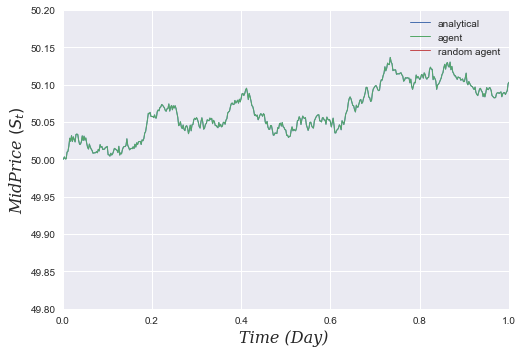

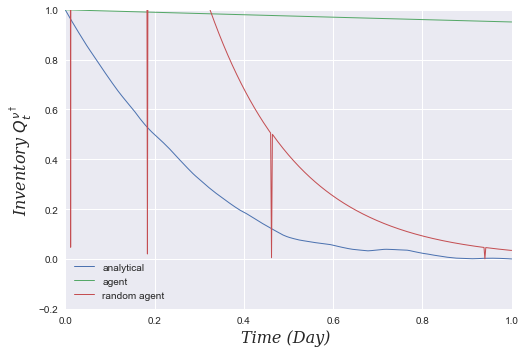

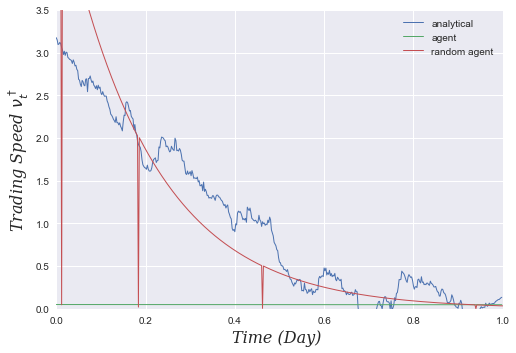

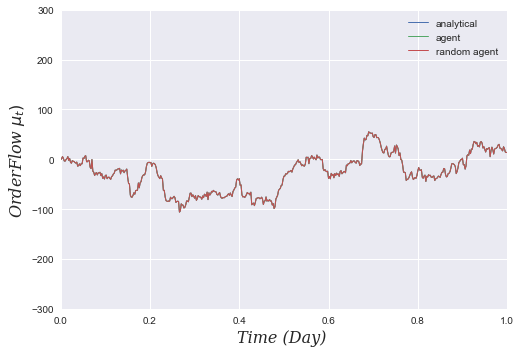

In [49]:
# Visualizing variables as time procresses 
#50-100
OrderFlow_helpers.PlotPath(t, T, np.vstack([S, env.simulator.S, S_rand]), idxfig, sigma, [initial_price - 2*sigma, initial_price + 2 * sigma], 'MidPrice ' + r'$(S_t)$')
OrderFlow_helpers.PlotPath(t, T, np.vstack([Q, env.simulator.Q, Q_rand]), idxfig, sigma, [-2*sigma, initial_invt],'Inventory ' + r'$Q_t^{\nu^\dagger}$')
OrderFlow_helpers.PlotPath(t, T, np.vstack([nu, env.simulator.actions, nu_rand]), idxfig, sigma, [0, 3.5], 'Trading Speed ' + r'$\nu_t^\dagger$')
OrderFlow_helpers.PlotPath(t, T, np.vstack([mu, env.simulator.mu, mu_rand]), idxfig, sigma, [-300, 300], 'OrderFlow ' + r'$\mu_t)$')
#OrderFlow_helpers.PlotPath(t, T, np.vstack([X, env.simulator.X, X_rand]), idxfig, sigma, [-300, 300], 'Cash ' + r'$X_t)$')

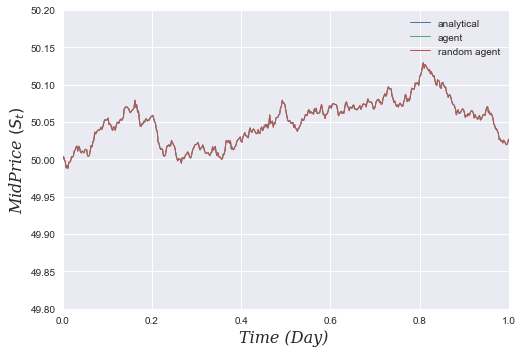

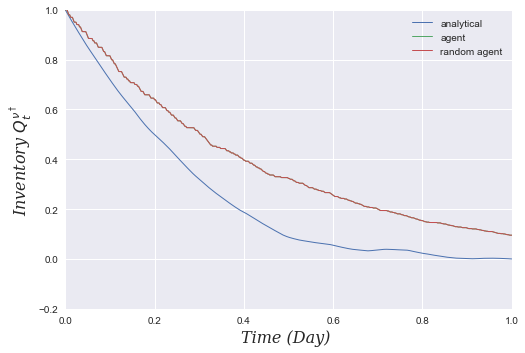

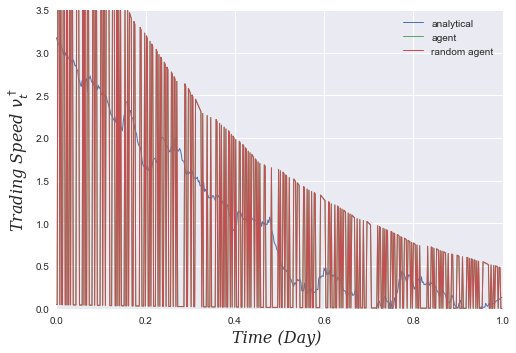

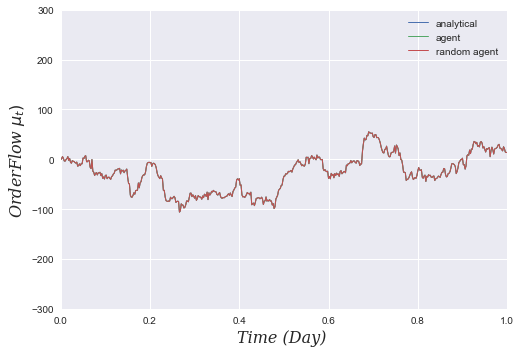

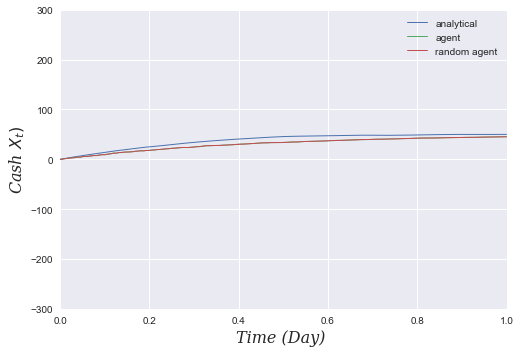

In [36]:
# Visualizing variables as time procresses 
#50-100
OrderFlow_helpers.PlotPath(t, T, np.vstack([S, env.simulator.S, env.simulator.S]), idxfig, sigma, [initial_price - 2*sigma, initial_price + 2 * sigma], 'MidPrice ' + r'$(S_t)$')
OrderFlow_helpers.PlotPath(t, T, np.vstack([Q, env.simulator.Q, env.simulator.Q]), idxfig, sigma, [-2*sigma, initial_invt],'Inventory ' + r'$Q_t^{\nu^\dagger}$')
OrderFlow_helpers.PlotPath(t, T, np.vstack([nu, env.simulator.actions, env.simulator.actions]), idxfig, sigma, [0, 3.5], 'Trading Speed ' + r'$\nu_t^\dagger$')
OrderFlow_helpers.PlotPath(t, T, np.vstack([mu, env.simulator.mu, env.simulator.mu]), idxfig, sigma, [-300, 300], 'OrderFlow ' + r'$\mu_t)$')
OrderFlow_helpers.PlotPath(t, T, np.vstack([X, env.simulator.X, env.simulator.X]), idxfig, sigma, [-300, 300], 'Cash ' + r'$X_t)$')

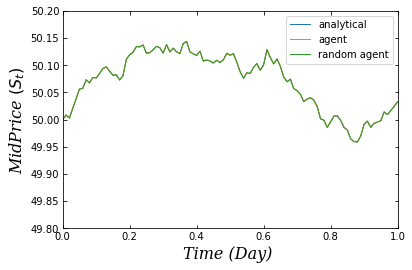

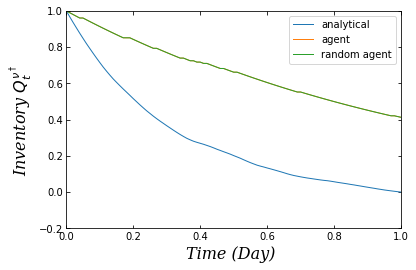

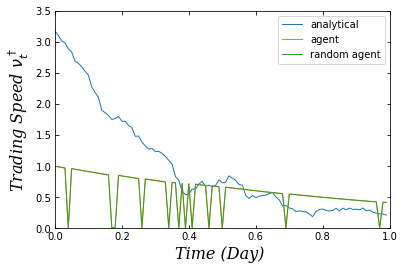

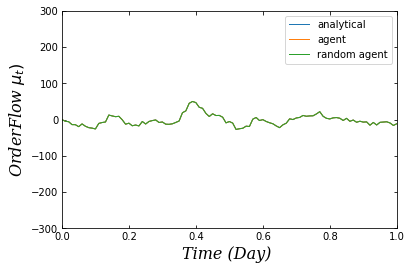

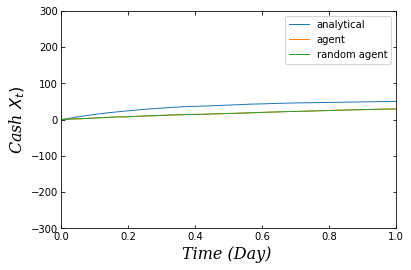

In [35]:
# Visualizing variables as time procresses 
#50-100
OrderFlow_helpers.PlotPath(t, T, np.vstack([S, env.simulator.S, env.simulator.S]), idxfig, sigma, [initial_price - 2*sigma, initial_price + 2 * sigma], 'MidPrice ' + r'$(S_t)$')
OrderFlow_helpers.PlotPath(t, T, np.vstack([Q, env.simulator.Q, env.simulator.Q]), idxfig, sigma, [-2*sigma, initial_invt],'Inventory ' + r'$Q_t^{\nu^\dagger}$')
OrderFlow_helpers.PlotPath(t, T, np.vstack([nu, env.simulator.actions, env.simulator.actions]), idxfig, sigma, [0, 3.5], 'Trading Speed ' + r'$\nu_t^\dagger$')
OrderFlow_helpers.PlotPath(t, T, np.vstack([mu, env.simulator.mu, env.simulator.mu]), idxfig, sigma, [-300, 300], 'OrderFlow ' + r'$\mu_t)$')
OrderFlow_helpers.PlotPath(t, T, np.vstack([X, env.simulator.X, env.simulator.X]), idxfig, sigma, [-300, 300], 'Cash ' + r'$X_t)$')

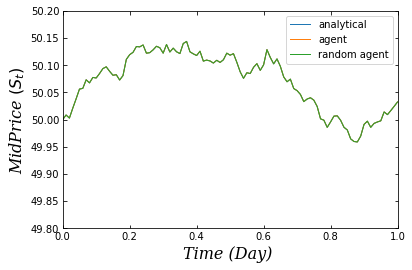

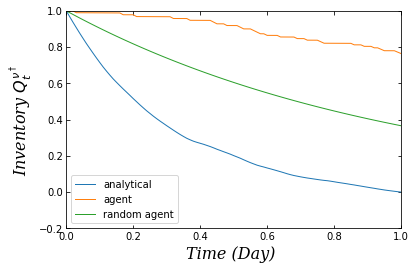

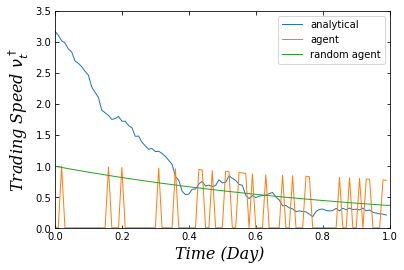

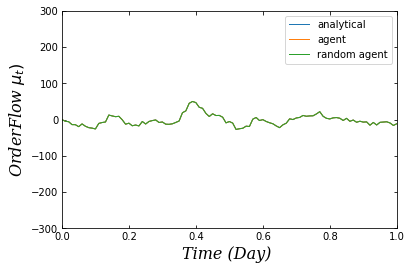

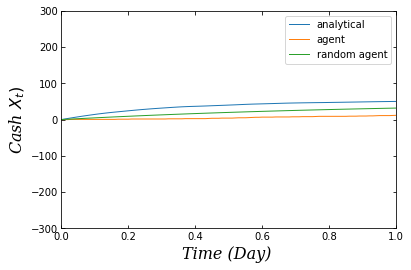

In [41]:
# Visualizing variables as time procresses 
#50-100
OrderFlow_helpers.PlotPath(t, T, np.vstack([S, env.simulator.S, S_rand]), idxfig, sigma, [initial_price - 2*sigma, initial_price + 2 * sigma], 'MidPrice ' + r'$(S_t)$')
OrderFlow_helpers.PlotPath(t, T, np.vstack([Q, env.simulator.Q, Q_rand]), idxfig, sigma, [-2*sigma, initial_invt],'Inventory ' + r'$Q_t^{\nu^\dagger}$')
OrderFlow_helpers.PlotPath(t, T, np.vstack([nu, env.simulator.actions, nu_rand]), idxfig, sigma, [0, 3.5], 'Trading Speed ' + r'$\nu_t^\dagger$')
OrderFlow_helpers.PlotPath(t, T, np.vstack([mu, env.simulator.mu, mu_rand]), idxfig, sigma, [-300, 300], 'OrderFlow ' + r'$\mu_t)$')
OrderFlow_helpers.PlotPath(t, T, np.vstack([X, env.simulator.X, X_rand]), idxfig, sigma, [-300, 300], 'Cash ' + r'$X_t)$')

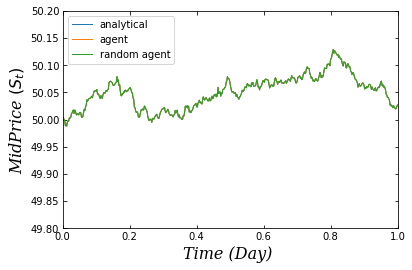

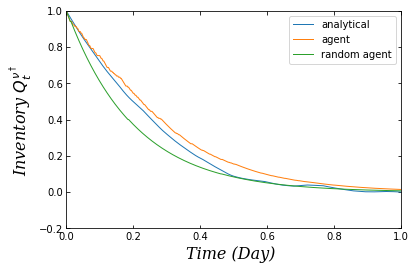

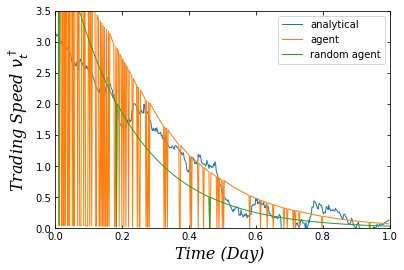

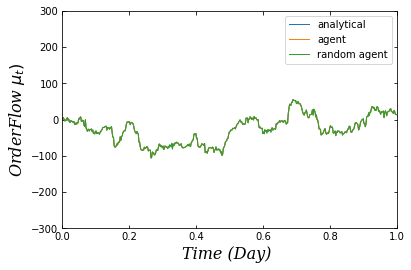

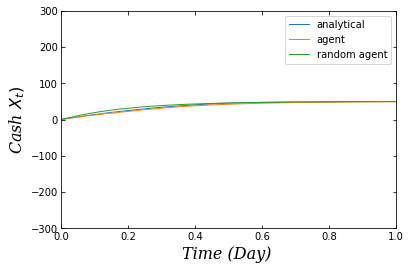

In [41]:
# Visualizing variables as time procresses 
#100-500
OrderFlow_helpers.PlotPath(t, T, np.vstack([S, env.simulator.S, S_rand]), idxfig, sigma, [initial_price - 2*sigma, initial_price + 2 * sigma], 'MidPrice ' + r'$(S_t)$')
OrderFlow_helpers.PlotPath(t, T, np.vstack([Q, env.simulator.Q, Q_rand]), idxfig, sigma, [-2*sigma, initial_invt],'Inventory ' + r'$Q_t^{\nu^\dagger}$')
OrderFlow_helpers.PlotPath(t, T, np.vstack([nu, env.simulator.actions, nu_rand]), idxfig, sigma, [0, 3.5], 'Trading Speed ' + r'$\nu_t^\dagger$')
OrderFlow_helpers.PlotPath(t, T, np.vstack([mu, env.simulator.mu, mu_rand]), idxfig, sigma, [-300, 300], 'OrderFlow ' + r'$\mu_t)$')
OrderFlow_helpers.PlotPath(t, T, np.vstack([X, env.simulator.X, X_rand]), idxfig, sigma, [-300, 300], 'Cash ' + r'$X_t)$')
